In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

In [3]:
library(hflights)

In [4]:
library(reshape2)

Warning message:
"package 'reshape2' was built under R version 3.4.4"

In [5]:

data(hflights, package='hflights')

str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

Step 1 : 출발 공항에 대해서 도착 공항별로 평균 출발 지연시간, 평균 도착 지연시간을 구하시오. (평균 출발 지연시간과 평균 도착 지연시간은 소수점 셋째자리 까지 표시) 

In [6]:
flights.1 <- hflights %>% 
group_by(Origin, Dest) %>%
summarise(avg_delay = round(mean(DepDelay , na.rm = T), digit=3), avg_ArrDelay = round(mean(ArrDelay, na.rm = T), digits=3))

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [7]:
head(flights.1)

Origin,Dest,avg_delay,avg_ArrDelay
HOU,ABQ,11.582,6.001
HOU,ATL,9.129,6.810
HOU,AUS,12.189,9.274
HOU,BHM,15.015,6.673
HOU,BKG,-3.202,-16.234
HOU,BNA,11.395,5.394


Step 2 : Step 1의 결과를 이용하여 아래의 그림을 그리기 위한 melting을 하시오.

In [8]:
flights.melt <- melt(flights.1, id=c("Origin"), measure=c("avg_delay","avg_ArrDelay"), variable.name="Delay_type",
    value.name = 'Deley_time', na.rm = T)

In [9]:
head(flights.melt)

Origin,Delay_type,Deley_time
HOU,avg_delay,11.582
HOU,avg_delay,9.129
HOU,avg_delay,12.189
HOU,avg_delay,15.015
HOU,avg_delay,-3.202
HOU,avg_delay,11.395


In [10]:
ggplot(flights.melt, aes(x=Deley_time, fill=Delay_type, alpha=0.00001)) + 
geom_density(colour = "lightgray", size = 0.00001) +
facet_wrap(~Origin, nrow=2)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): png() 장치를 시작할 수 없습니다


plot without title

# 2번째

Step 1 : 목적지 공항에 대해 연착 건수를 구하고, 연착 건수가 2000회 이상인 공항에 대한 데이터만 따로 추출하시오. (연착 건수는 도착 지연시간 5분 이상인 것으로 할 것) 

In [11]:
flights.2 <- hflights %>%
group_by(Dest) %>%
summarise(num_DepDelay = sum(DepDelay  > 5, na.rm = T))

In [ ]:
head(flights.2)

In [12]:
flights.3 <- flights.2[flights.2$num_DepDelay >= 2000, ]

In [ ]:
head(flights.3)

Step 2 : Step 1의 결과를 이용하여 (목적지 공항, 월) 별 결항 횟수, 회항 횟수, 운항 횟수를 구하시오. (운항 횟수는 결항과 회항을 제외할 것) 

In [13]:
flights.4 <- hflights[hflights$Dest == flights.3$Dest,]

In [ ]:
head(flights.4,2)

In [14]:
flights.5 <- flights.4 %>%
group_by(Dest, Month) %>%
summarise(
  num_Cancelled=sum(Cancelled),
  num_Diverted=sum(Diverted),
  num_Air=length(Dest)-sum(Cancelled)-sum(Diverted)) 

In [15]:
flights.5

Dest,Month,num_Cancelled,num_Diverted,num_Air
ATL,1,5,0,96
ATL,2,2,0,90
ATL,3,5,0,121
ATL,4,6,2,121
ATL,5,3,0,129
ATL,6,1,2,112
ATL,7,2,0,102
ATL,8,1,1,106
ATL,9,1,0,101
ATL,10,1,0,102


Step 3 : Step 2의 결과를 이용하여 아래의 그림을 그리기 위해 데이터를 melting 하시오.

In [19]:
melt.hflights.5 <- melt(flights.5, id=c("Dest","Month"), measure=c("num_Cancelled","num_Diverted","num_Air"), na.rm=T)

In [20]:
head(melt.hflights.5)

Dest,Month,variable,value
ATL,1,num_Cancelled,5
ATL,2,num_Cancelled,2
ATL,3,num_Cancelled,5
ATL,4,num_Cancelled,6
ATL,5,num_Cancelled,3
ATL,6,num_Cancelled,1


In [29]:
melt2.hflights.5  <- melt.hflights.5 %>%
group_by(Month, variable) %>%
mutate(cnt = value/sum(value))

In [39]:
melt2.hflights.5

Dest,Month,variable,value,cnt
ATL,1,num_Cancelled,5,0.55555556
ATL,2,num_Cancelled,2,0.05263158
ATL,3,num_Cancelled,5,0.55555556
ATL,4,num_Cancelled,6,0.31578947
ATL,5,num_Cancelled,3,0.18750000
ATL,6,num_Cancelled,1,0.14285714
ATL,7,num_Cancelled,2,0.22222222
ATL,8,num_Cancelled,1,0.25000000
ATL,9,num_Cancelled,1,0.16666667
ATL,10,num_Cancelled,1,0.20000000


Step 4 : Step 3의 결과를 이용하여 아래의 그림을 그리시오.

Warning message:
"Removed 18 rows containing missing values (position_stack)."

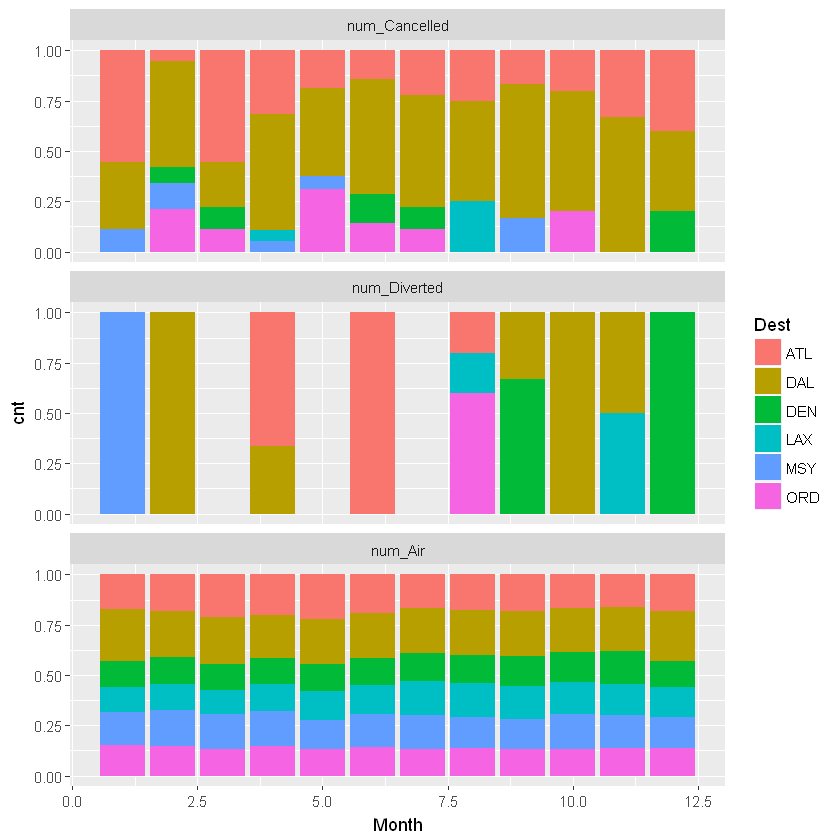

In [32]:
mm <- ggplot(melt2.hflights.5, aes(x=Month, y=cnt, fill=Dest)) + geom_bar(stat = "identity")
mm + facet_wrap(~variable,nrow=3)

# 3번째

In [33]:
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

In [16]:
flights.6 <- hflights %>% 
group_by(UniqueCarrier) %>%
summarise(
  num_Cancelled=sum(Cancelled),
  num_Diverted=sum(Diverted),
  num_Air=length(Dest)-sum(Cancelled)-sum(Diverted)) 

In [18]:
flights.6 %>%
arrange(desc(num_Air))

UniqueCarrier,num_Cancelled,num_Diverted,num_Air
XE,1132,252,71669
CO,475,184,69373
WN,703,104,44536
OO,224,56,15781
MQ,135,9,4504
US,46,6,4030
AA,60,6,3178
DL,42,8,2591
EV,76,7,2121
FL,21,7,2111


In [20]:
flights.7 <- flights.6[order(-flights.6$num_Air),][1:3,]

In [38]:
flights.7

UniqueCarrier,num_Cancelled,num_Diverted,num_Air
XE,1132,252,71669
CO,475,184,69373
WN,703,104,44536


Step 2 : Step1의 결과를 이용하여 상위 3개 항공사에 대한 평균 도착 지연시간,평균 출발 지연시간을 구하시오. (평균 출발 지연시간과 평균 도착 지연시간은 소수점 셋째자리까지 표시) 

In [21]:
flights.8 <- hflights[hflights$UniqueCarrier==flights.7$UniqueCarrier,] %>%
group_by(UniqueCarrier) %>%
summarise(
avg_DepDelay = round(mean(DepDelay, na.rm=TRUE), digits=3), avg_ArrDelay = round(mean(ArrDelay, na.rm=TRUE), digits=3)
)

In [22]:
flights.8

UniqueCarrier,avg_DepDelay,avg_ArrDelay
CO,9.123,5.986
WN,13.812,7.882
XE,7.801,8.239


Step 3 : Step 2의 결과를 이용하여 평균 도착 지연시간이 가장 긴 항공사에 대한 데이터를 추출하고 (월, 요일) 별 평균 도착 지연시간과 평균 출발 지연시간을 다시 구하시오.

In [23]:
flights.9 <- hflights[hflights$UniqueCarrier==flights.8[order(-flights.8$avg_ArrDelay),][1,]$UniqueCarrier,] %>%
group_by(Month, DayOfWeek) %>%
summarise(
avg_DepDelay = round(mean(DepDelay, na.rm=TRUE), digits=3), avg_ArrDelay = round(mean(ArrDelay, na.rm=TRUE), digits=3))

In [24]:
flights.9

Month,DayOfWeek,avg_DepDelay,avg_ArrDelay
1,1,7.822,7.299
1,2,2.417,3.067
1,3,-0.426,-2.655
1,4,4.086,5.711
1,5,1.050,0.005
1,6,1.280,2.191
1,7,7.622,6.739
2,1,2.906,4.968
2,2,5.769,4.352
2,3,6.223,6.612


Step 4 : Step 3의 결과를 이용하여 아래와 같은 그림을 그리기 위해 데이터를 melting 하시오.

In [42]:
flights.9.melt <-
melt(flights.9, id=c("Month","DayOfWeek"), measure=c("avg_ArrDelay","avg_DepDelay"), 
     variable.name="Delay_type", value.name="Delay_time", na.rm=T)

In [44]:
flights.9.melt <-melt(flights.9, id=c("Month","DayOfWeek"), measure=c("avg_ArrDelay","avg_DepDelay"), na.rm=T)

In [45]:
head(flights.9.melt)

Month,DayOfWeek,variable,value
1,1,avg_ArrDelay,7.299
1,2,avg_ArrDelay,3.067
1,3,avg_ArrDelay,-2.655
1,4,avg_ArrDelay,5.711
1,5,avg_ArrDelay,0.005
1,6,avg_ArrDelay,2.191


In [41]:
dcast(flights.9.melt, Month + DayOfWeek ~ variable )

Month,DayOfWeek,avg_ArrDelay,avg_DepDelay
1,1,7.299,7.822
1,2,3.067,2.417
1,3,-2.655,-0.426
1,4,5.711,4.086
1,5,0.005,1.050
1,6,2.191,1.280
1,7,6.739,7.622
2,1,4.968,2.906
2,2,4.352,5.769
2,3,6.612,6.223


Step 5 : Step 4의 결과를 이용하여 아래와 같은 그림을 그리시오.

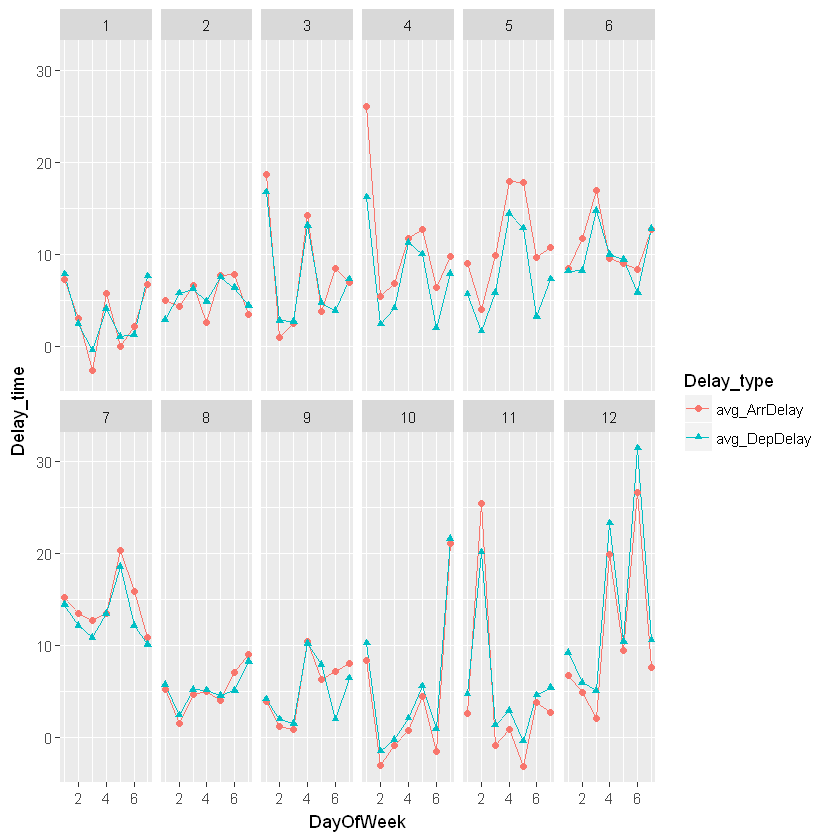

In [49]:
mmm <- ggplot(flights.9.melt, aes(x=DayOfWeek, y=Delay_time, group=Delay_type, 
                                  shape=Delay_type, color=Delay_type)) + geom_line() + geom_point()

mmm + facet_wrap(~Month,nrow=2)